In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Hanagon/entrenamiento.csv')
df

,sentence,sentiments,labels
0,@myendlesshazza a. que puto mal escribo b. me ...,N,0
1,Quiero mogollón a @AlbaBenito99 pero sobretodo...,P,1
2,Vale he visto la tia bebiendose su regla y me ...,N,0
3,@Yulian_Poe @guillermoterry1 Ah. mucho más por...,P,1
4,@toNi_end seria mejor que dejasen de emitir es...,N,0
...,...,...,...
1120,Para mí mi mejor año fue el 2015,P,1
1121,Hoy va a ser un dia muy largo...,N,0
1122,11:11 que no me encuentre mal,NEU,3
1123,Es que son muy bonitas jo,P,1


In [ ]:
df['sentiments'].value_counts()

N       474
P       354
NONE    157
NEU     140
Name: sentiments, dtype: int64

In [ ]:
def contar_palabras(texto):
  l = texto.split(' ')
  return len(l)

In [ ]:
df['word_count'] = df['sentence'].apply(contar_palabras)
df.head()

,sentence,sentiments,labels,word_count
0,@myendlesshazza a. que puto mal escribo b. me ...,N,0,19
1,Quiero mogollón a @AlbaBenito99 pero sobretodo...,P,1,14
2,Vale he visto la tia bebiendose su regla y me ...,N,0,14
3,@Yulian_Poe @guillermoterry1 Ah. mucho más por...,P,1,15
4,@toNi_end seria mejor que dejasen de emitir es...,N,0,18


In [ ]:
df['word_count'].max()

33

In [ ]:
df['word_count'].min()

5

In [ ]:
df = df.rename(columns={'sentence':'text'})
df = df.rename(columns={'sentiments':'sentimiento'})

In [ ]:
import matplotlib.pyplot as plt

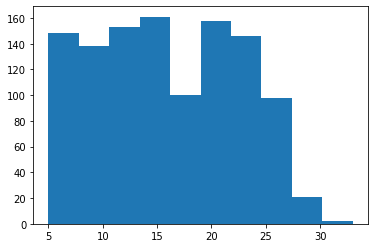

In [ ]:
plt.hist(df['word_count'], bins=10)
plt.show()

In [ ]:
df

,text,sentimiento,labels,word_count
0,@myendlesshazza a. que puto mal escribo b. me ...,N,0,19
1,Quiero mogollón a @AlbaBenito99 pero sobretodo...,P,1,14
2,Vale he visto la tia bebiendose su regla y me ...,N,0,14
3,@Yulian_Poe @guillermoterry1 Ah. mucho más por...,P,1,15
4,@toNi_end seria mejor que dejasen de emitir es...,N,0,18
...,...,...,...,...
1120,Para mí mi mejor año fue el 2015,P,1,8
1121,Hoy va a ser un dia muy largo...,N,0,8
1122,11:11 que no me encuentre mal,NEU,3,6
1123,Es que son muy bonitas jo,P,1,6


In [ ]:
df2=df['sentimiento'].replace('P',1).replace('NEU',1).replace('NONE',1).replace('N',0)
df['labels_mod'] = df2
df

,text,sentimiento,labels,word_count,labels_mod
0,@myendlesshazza a. que puto mal escribo b. me ...,N,0,19,0
1,Quiero mogollón a @AlbaBenito99 pero sobretodo...,P,1,14,1
2,Vale he visto la tia bebiendose su regla y me ...,N,0,14,0
3,@Yulian_Poe @guillermoterry1 Ah. mucho más por...,P,1,15,1
4,@toNi_end seria mejor que dejasen de emitir es...,N,0,18,0
...,...,...,...,...,...
1120,Para mí mi mejor año fue el 2015,P,1,8,1
1121,Hoy va a ser un dia muy largo...,N,0,8,0
1122,11:11 que no me encuentre mal,NEU,3,6,1
1123,Es que son muy bonitas jo,P,1,6,1


In [ ]:
df3 = df[['text', 'labels_mod']]
df3 = df3.rename(columns={'labels_mod':'labels'})
df3

,text,labels
0,@myendlesshazza a. que puto mal escribo b. me ...,0
1,Quiero mogollón a @AlbaBenito99 pero sobretodo...,1
2,Vale he visto la tia bebiendose su regla y me ...,0
3,@Yulian_Poe @guillermoterry1 Ah. mucho más por...,1
4,@toNi_end seria mejor que dejasen de emitir es...,0
...,...,...
1120,Para mí mi mejor año fue el 2015,1
1121,Hoy va a ser un dia muy largo...,0
1122,11:11 que no me encuentre mal,1
1123,Es que son muy bonitas jo,1


In [ ]:
from sklearn.model_selection import train_test_split
gimnasio, partido = train_test_split(df3, test_size=0.3)

print(gimnasio.head())
print(partido.head())

                                                   text  labels
133   @AdriMarinaB Así me gusta, cada cosa a su CCAA...       0
470   Lo siento mucho  bueno, os he dejado un vídeo ...       0
128   @miguelagaiteiro @cultrun @lozanoirene Si hay ...       1
298   @rabiekhd jajajajajaja me meo que yo tengo mi ...       1
1075                      @PacoMoronta pero yo te kiero       1
                                                  text  labels
722  Así leyendo entre líneas y el discurso de @san...       1
304  @Juanjok Mira q me gustaría, Juan, hablar cont...       1
798  @elOrdenMundial @luisalisferrer @BBCWorld ning...       1
381  @SATU_9R @LaF1es No, pero dejarte la piel, ir ...       1
494  Siempre las mejores personas son las que más s...       0


In [ ]:
df3.to_csv('/content/gdrive/MyDrive/Hanagon/gimnasio.csv', index=False)
df3.to_csv('/content/gdrive/MyDrive/Hanagon/partido.csv', index=False)